In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
### Note that not all ETL was done here. Some was done in Excel

In [2]:
# https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023/data

df = pd.read_csv('world-data-2023.csv')

In [3]:
df.describe()

,Birth Rate,Calling Code,Fertility Rate,Infant mortality,Life expectancy,Maternal mortality ratio,Physicians per thousand,Latitude,Longitude
count,189.000000,194.000000,188.000000,189.000000,187.000000,181.000000,188.000000,194.000000,194.000000
mean,20.214974,360.546392,2.698138,21.332804,72.279679,160.392265,1.839840,19.092351,20.232434
std,9.945774,323.236419,1.282267,19.548058,7.483661,233.502024,1.684261,23.961779,66.716110
min,5.900000,1.000000,0.980000,1.400000,52.800000,2.000000,0.010000,-40.900557,-175.198242
25%,11.300000,82.500000,1.705000,6.000000,67.000000,13.000000,0.332500,4.544175,-7.941496
50%,17.950000,255.500000,2.245000,14.000000,73.200000,53.000000,1.460000,17.273849,20.972652
75%,28.750000,506.750000,3.597500,32.700000,77.500000,186.000000,2.935000,40.124603,48.281523
max,46.080000,1876.000000,6.910000,84.500000,85.400000,1150.000000,8.420000,64.963051,178.065032


In [4]:
df.dtypes

Country                                       object
Density\n(P/Km2)                              object
Abbreviation                                  object
Agricultural Land( %)                         object
Land Area(Km2)                                object
Armed Forces size                             object
Birth Rate                                   float64
Calling Code                                 float64
Capital/Major City                            object
Co2-Emissions                                 object
CPI                                           object
CPI Change (%)                                object
Currency-Code                                 object
Fertility Rate                               float64
Forested Area (%)                             object
Gasoline Price                                object
GDP                                           object
Gross primary education enrollment (%)        object
Gross tertiary education enrollment (%)       

In [5]:
df.isnull().sum()

Country                                       0
Density\n(P/Km2)                              0
Abbreviation                                  7
Agricultural Land( %)                         7
Land Area(Km2)                                1
Armed Forces size                            24
Birth Rate                                    6
Calling Code                                  1
Capital/Major City                            3
Co2-Emissions                                 7
CPI                                          17
CPI Change (%)                               16
Currency-Code                                15
Fertility Rate                                7
Forested Area (%)                             7
Gasoline Price                               20
GDP                                           2
Gross primary education enrollment (%)        7
Gross tertiary education enrollment (%)      12
Infant mortality                              6
Largest city                            

In [6]:
df = df.dropna()

In [7]:
# converting types to percents and numbers to be useable for correlation
df = df.replace(',','', regex=True)
df["Agricultural Land( %)"] = df['Agricultural Land( %)'].str.rstrip('%').astype('float') / 100.0
df['CPI Change (%)'] = df['CPI Change (%)'].str.rstrip('%').astype('float') / 100.0
df['Forested Area (%)'] = df['Forested Area (%)'].str.rstrip('%').astype('float') / 100.0
df['Out of pocket health expenditure'] = df['Out of pocket health expenditure'].str.rstrip('%').astype('float') / 100.0
df['Population: Labor force participation (%)'] = df['Population: Labor force participation (%)'].str.rstrip('%').astype('float') / 100.0
df['Tax revenue (%)'] = df['Tax revenue (%)'].str.rstrip('%').astype('float') / 100.0
df['Total tax rate'] = df['Total tax rate'].str.rstrip('%').astype('float') / 100.0
df['Unemployment rate'] = df['Unemployment rate'].str.rstrip('%').astype('float') / 100.0
df['Gross primary education enrollment (%)'] = df['Gross primary education enrollment (%)'].str.rstrip('%').astype('float') / 100.0
df['Gross tertiary education enrollment (%)'] = df['Gross tertiary education enrollment (%)'].str.rstrip('%').astype('float') / 100.0
df['Minimum wage'] = df['Minimum wage'].str.lstrip('$').astype('float')
df['Gasoline Price'] = df['Gasoline Price'].str.lstrip('$').astype('float')
df['GDP'] = df['GDP'].str.lstrip('$').astype('float')
test = df.drop(['Country', 'Abbreviation','Calling Code', 'Capital/Major City', 'Currency-Code', 'Largest city', 'Official language','Latitude', 'Longitude'], axis=1)
display(test)

,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),...,Maternal mortality ratio,Minimum wage,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population
0,60,0.581,652230,323000,32.49,8672,149.9,0.023,4.47,0.021,...,638.0,0.43,0.784,0.28,38041754,0.489,0.093,0.714,0.1112,9797273
1,105,0.431,28748,9000,11.78,4536,119.05,0.014,1.62,0.281,...,15.0,1.12,0.569,1.20,2854191,0.557,0.186,0.366,0.1233,1747593
2,18,0.174,2381741,317000,24.28,150006,151.36,0.020,3.02,0.008,...,112.0,0.95,0.281,1.72,43053054,0.412,0.372,0.661,0.1170,31510100
4,26,0.475,1246700,117000,40.73,34693,261.73,0.171,5.52,0.463,...,241.0,0.71,0.334,0.21,31825295,0.775,0.092,0.491,0.0689,21061025
6,17,0.543,2780400,105000,17.02,201348,232.75,0.535,2.26,0.098,...,39.0,3.35,0.176,3.96,44938712,0.613,0.101,1.063,0.0979,41339571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,75,0.717,603550,297000,8.70,202250,281.66,0.079,1.30,0.167,...,19.0,0.84,0.478,2.99,44385155,0.542,0.201,0.452,0.0888,30835699
185,281,0.717,243610,148000,11.00,379025,119.62,0.017,1.68,0.131,...,7.0,10.13,0.148,2.81,66834405,0.628,0.255,0.306,0.0385,55908316
187,20,0.826,176215,22000,13.86,6766,202.92,0.079,1.97,0.107,...,17.0,1.66,0.162,5.05,3461734,0.640,0.201,0.418,0.0873,3303394
191,314,0.393,331210,522000,16.75,192668,163.52,0.028,2.05,0.481,...,43.0,0.73,0.435,0.82,96462106,0.774,0.191,0.376,0.0201,35332140


In [8]:
# https://www.who.int/data/gho/data/themes/air-pollution/who-air-quality-database
who = pd.read_csv('data.csv')
who.columns

Index(['IndicatorCode', 'Indicator', 'ValueType', 'ParentLocationCode',
       'ParentLocation', 'Location type', 'SpatialDimValueCode', 'Location',
       'Period type', 'Period', 'IsLatestYear', 'Dim1 type', 'Dim1',
       'Dim1ValueCode', 'Dim2 type', 'Dim2', 'Dim2ValueCode', 'Dim3 type',
       'Dim3', 'Dim3ValueCode', 'DataSourceDimValueCode', 'DataSource',
       'FactValueNumericPrefix', 'Avg', 'FactValueUoM',
       'FactValueNumericLowPrefix', 'Low', 'FactValueNumericHighPrefix',
       'High', 'Value', 'FactValueTranslationID', 'FactComments', 'Language',
       'DateModified'],
      dtype='object')

In [9]:
who = who[['Location','IsLatestYear','Avg']]
display(who)

,Location,IsLatestYear,Avg
0,Kenya,True,10.01
1,Trinidad and Tobago,True,10.02
2,United Kingdom of Great Britain and Northern I...,True,10.06
3,Grenada,True,10.08
4,Brazil,True,10.09
...,...,...,...
9445,Belize,False,9.92
9446,Trinidad and Tobago,False,9.92
9447,Kenya,False,9.94
9448,United States of America,False,9.95


In [10]:
whoavg = who[who['IsLatestYear']==True]
whoavg = whoavg[['Location','Avg']]
whoavg = whoavg.rename(columns={'Location':'Country', 'Avg':'PM 2.5 Con'})
display(whoavg)

,Country,PM 2.5 Con
0,Kenya,10.01
1,Trinidad and Tobago,10.02
2,United Kingdom of Great Britain and Northern I...,10.06
3,Grenada,10.08
4,Brazil,10.09
...,...,...
940,Switzerland,9.87
941,Mauritius,9.89
942,Belgium,9.91
943,Netherlands,9.96


In [11]:
whotest = pd.DataFrame(whoavg.groupby(['Country']).mean().reset_index())
display(whotest)

,Country,PM 2.5 Con
0,Afghanistan,68.038
1,Albania,16.322
2,Algeria,22.680
3,Andorra,8.560
4,Angola,28.890
...,...,...
190,Venezuela (Bolivarian Republic of),16.302
191,Viet Nam,20.978
192,Yemen,42.086
193,Zambia,17.714


In [12]:
merge2 = pd.merge(df, whotest, how = "left")
display(merge2)

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude,PM 2.5 Con
0,Afghanistan,60,AF,0.581,652230,323000,32.49,93.0,Kabul,8672,...,0.28,38041754,0.489,0.093,0.714,0.1112,9797273,33.939110,67.709953,68.038
1,Albania,105,AL,0.431,28748,9000,11.78,355.0,Tirana,4536,...,1.20,2854191,0.557,0.186,0.366,0.1233,1747593,41.153332,20.168331,16.322
2,Algeria,18,DZ,0.174,2381741,317000,24.28,213.0,Algiers,150006,...,1.72,43053054,0.412,0.372,0.661,0.1170,31510100,28.033886,1.659626,22.680
3,Angola,26,AO,0.475,1246700,117000,40.73,244.0,Luanda,34693,...,0.21,31825295,0.775,0.092,0.491,0.0689,21061025,-11.202692,17.873887,28.890
4,Argentina,17,AR,0.543,2780400,105000,17.02,54.0,Buenos Aires,201348,...,3.96,44938712,0.613,0.101,1.063,0.0979,41339571,-38.416097,-63.616672,11.832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,Ukraine,75,UA,0.717,603550,297000,8.70,380.0,Kyiv,202250,...,2.99,44385155,0.542,0.201,0.452,0.0888,30835699,48.379433,31.165580,13.698
103,United Kingdom,281,GB,0.717,243610,148000,11.00,44.0,London,379025,...,2.81,66834405,0.628,0.255,0.306,0.0385,55908316,55.378051,-3.435973,NaN
104,Uruguay,20,UY,0.826,176215,22000,13.86,598.0,Montevideo,6766,...,5.05,3461734,0.640,0.201,0.418,0.0873,3303394,-32.522779,-55.765835,8.458
105,Vietnam,314,VN,0.393,331210,522000,16.75,84.0,Hanoi,192668,...,0.82,96462106,0.774,0.191,0.376,0.0201,35332140,14.058324,108.277199,NaN


In [13]:
# https://apps.who.int/gho/data/node.main.11
whomort = pd.read_csv('xmart.csv')
display(whomort)

,Country,Year,Both sexes,Male,Female
0,Afghanistan,2016,245,272,216
1,Afghanistan,2015,233,254,210
2,Afghanistan,2014,234,254,213
3,Afghanistan,2013,235,254,215
4,Afghanistan,2012,242,262,221
...,...,...,...,...,...
3106,Zimbabwe,2004,694,725,670
3107,Zimbabwe,2003,697,728,671
3108,Zimbabwe,2002,695,728,667
3109,Zimbabwe,2001,688,723,656


In [14]:
whomort.dtypes

Country       object
Year           int64
Both sexes     int64
Male           int64
Female         int64
dtype: object

In [15]:
whomort = whomort[whomort['Year']==2016]

In [16]:
merge3 = pd.merge(whomort, merge2, how = "right")
merge3

,Country,Year,Both sexes,Male,Female,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,...,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude,PM 2.5 Con
0,Afghanistan,2016.0,245.0,272.0,216.0,60,AF,0.581,652230,323000,...,0.28,38041754,0.489,0.093,0.714,0.1112,9797273,33.939110,67.709953,68.038
1,Albania,2016.0,96.0,122.0,71.0,105,AL,0.431,28748,9000,...,1.20,2854191,0.557,0.186,0.366,0.1233,1747593,41.153332,20.168331,16.322
2,Algeria,2016.0,95.0,106.0,84.0,18,DZ,0.174,2381741,317000,...,1.72,43053054,0.412,0.372,0.661,0.1170,31510100,28.033886,1.659626,22.680
3,Angola,2016.0,238.0,275.0,202.0,26,AO,0.475,1246700,117000,...,0.21,31825295,0.775,0.092,0.491,0.0689,21061025,-11.202692,17.873887,28.890
4,Argentina,2016.0,111.0,143.0,80.0,17,AR,0.543,2780400,105000,...,3.96,44938712,0.613,0.101,1.063,0.0979,41339571,-38.416097,-63.616672,11.832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,Ukraine,2016.0,180.0,264.0,98.0,75,UA,0.717,603550,297000,...,2.99,44385155,0.542,0.201,0.452,0.0888,30835699,48.379433,31.165580,13.698
103,United Kingdom,NaN,NaN,NaN,NaN,281,GB,0.717,243610,148000,...,2.81,66834405,0.628,0.255,0.306,0.0385,55908316,55.378051,-3.435973,NaN
104,Uruguay,2016.0,114.0,149.0,79.0,20,UY,0.826,176215,22000,...,5.05,3461734,0.640,0.201,0.418,0.0873,3303394,-32.522779,-55.765835,8.458
105,Vietnam,NaN,NaN,NaN,NaN,314,VN,0.393,331210,522000,...,0.82,96462106,0.774,0.191,0.376,0.0201,35332140,14.058324,108.277199,NaN


In [17]:
merge3 = merge3.dropna()

In [18]:
merge3.columns

Index(['Country', 'Year', 'Both sexes', 'Male', 'Female', 'Density\n(P/Km2)',
       'Abbreviation', 'Agricultural Land( %)', 'Land Area(Km2)',
       'Armed Forces size', 'Birth Rate', 'Calling Code', 'Capital/Major City',
       'Co2-Emissions', 'CPI', 'CPI Change (%)', 'Currency-Code',
       'Fertility Rate', 'Forested Area (%)', 'Gasoline Price', 'GDP',
       'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude', 'PM 2.5 Con'],
      dtype='object')

,Both sexes,Male,Female,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,...,Minimum wage,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,PM 2.5 Con
0,245.0,272.0,216.0,60,0.581,652230,323000,32.49,8672,149.9,...,0.43,0.784,0.28,38041754,0.489,0.093,0.714,0.1112,9797273,68.038
1,96.0,122.0,71.0,105,0.431,28748,9000,11.78,4536,119.05,...,1.12,0.569,1.20,2854191,0.557,0.186,0.366,0.1233,1747593,16.322
2,95.0,106.0,84.0,18,0.174,2381741,317000,24.28,150006,151.36,...,0.95,0.281,1.72,43053054,0.412,0.372,0.661,0.1170,31510100,22.680
3,238.0,275.0,202.0,26,0.475,1246700,117000,40.73,34693,261.73,...,0.71,0.334,0.21,31825295,0.775,0.092,0.491,0.0689,21061025,28.890
4,111.0,143.0,80.0,17,0.543,2780400,105000,17.02,201348,232.75,...,3.35,0.176,3.96,44938712,0.613,0.101,1.063,0.0979,41339571,11.832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,91.0,111.0,71.0,76,0.648,163610,48000,17.56,29937,155.33,...,0.47,0.398,1.30,11694719,0.461,0.211,0.607,0.1602,8099061,26.558
101,288.0,333.0,243.0,229,0.719,241038,46000,38.14,5680,173.87,...,0.01,0.405,0.17,44269594,0.703,0.117,0.337,0.0184,10784516,32.420
102,180.0,264.0,98.0,75,0.717,603550,297000,8.70,202250,281.66,...,0.84,0.478,2.99,44385155,0.542,0.201,0.452,0.0888,30835699,13.698
104,114.0,149.0,79.0,20,0.826,176215,22000,13.86,6766,202.92,...,1.66,0.162,5.05,3461734,0.640,0.201,0.418,0.0873,3303394,8.458


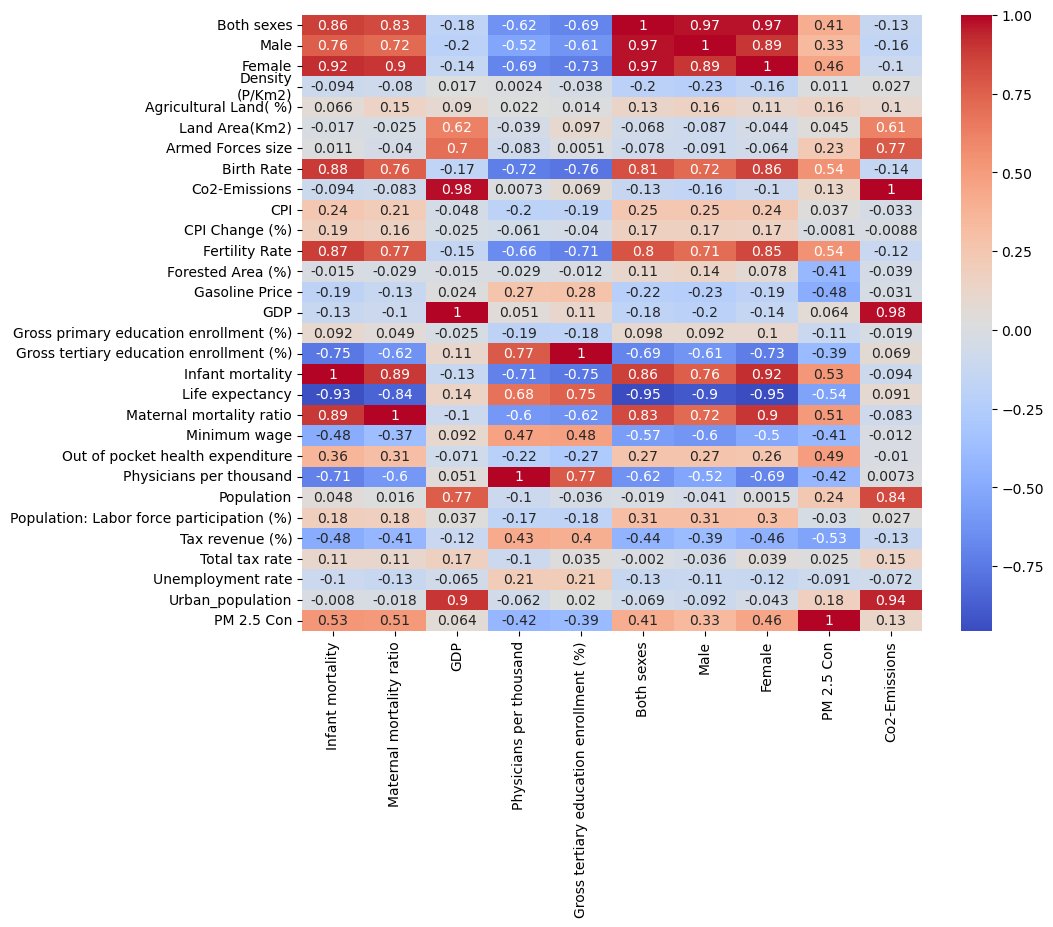

In [21]:
test2 = merge3.drop(['Country', 'Year', 'Abbreviation','Calling Code', 'Capital/Major City', 'Currency-Code', 'Largest city', 'Official language','Latitude', 'Longitude'], axis=1)
display(test2)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(test2.corr()[['Infant mortality', 'Maternal mortality ratio', 'GDP', 'Physicians per thousand', 'Gross tertiary education enrollment (%)', 'Both sexes', 'Male', 'Female', 'PM 2.5 Con', 'Co2-Emissions']], annot=True, cmap='coolwarm', ax=ax);

In [20]:
merge3.to_csv('combined.csv')